In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Check the eigenvalues of the Jacobian matrix

In [10]:
# Define the Jacobian matrix of the system
def jacobian_matrix(x, y):
    # Elements of the Jacobian matrix
    df_dx = -0.1 * 3 * x**2  # Partial derivative of dx/dt with respect to x
    df_dy = 2 * 3 * y**2     # Partial derivative of dx/dt with respect to y
    dg_dx = -2 * 3 * x**2    # Partial derivative of dy/dt with respect to x
    dg_dy = -0.1 * 3 * y**2  # Partial derivative of dy/dt with respect to y
    # Construct the Jacobian matrix
    return np.array([[df_dx, df_dy], [dg_dx, dg_dy]])

# Initial conditions or equilibrium point (e.g., x=0.1, y=0.1 as given)
x0, y0 = 0.1, 0.1

# Calculate the Jacobian matrix at this point
J = jacobian_matrix(x0, y0)

# Calculate the eigenvalues of the Jacobian matrix
eigenvalues = np.linalg.eigvals(J)

# Display the eigenvalues and check if the real parts are negative
print("Eigenvalues of the Jacobian matrix:", eigenvalues)
print("Real parts of eigenvalues:", np.real(eigenvalues))

# Check stability based on the real parts of the eigenvalues
if np.all(np.real(eigenvalues) < 0):
    print("The system is stable (all eigenvalues have negative real parts).")
else:
    print("The system may be unstable (some eigenvalues have non-negative real parts).")


Eigenvalues of the Jacobian matrix: [-0.003+0.06j -0.003-0.06j]
Real parts of eigenvalues: [-0.003 -0.003]
The system is stable (all eigenvalues have negative real parts).


### Generate Training Data by Numerically Solving the ODE Equation

1. Generate the data using an explicit scheme

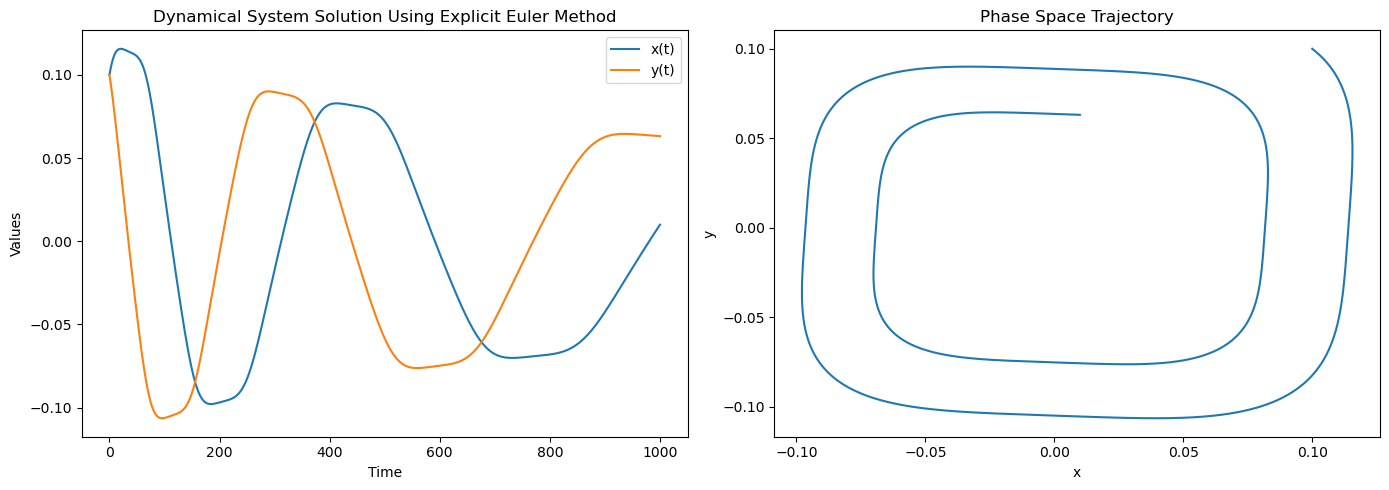

In [11]:
# Define the system of differential equations
def dynamical_system(z):
    x, y = z
    dxdt = -0.1 * x**3 + 2 * y**3
    dydt = -2 * x**3 - 0.1 * y**3
    return np.array([dxdt, dydt])

# Initial conditions
x0, y0 = 0.1, 0.1
initial_conditions = np.array([x0, y0])

# Parameters for the explicit Euler method
t_start = 0
t_end = 1000
dt = 0.00001  # Small time step for numerical stability
n_steps = int((t_end - t_start) / dt)
time_points = np.linspace(t_start, t_end, n_steps)

# Arrays to store the results of x(t) and y(t)
x_values = np.zeros(n_steps)
y_values = np.zeros(n_steps)
x_values[0], y_values[0] = initial_conditions

# Explicit Euler method loop
z = initial_conditions
for i in range(1, n_steps):
    z = z + dt * dynamical_system(z)  # Update based on current state
    x_values[i], y_values[i] = z  # Store updated values

# Plot x(t) and y(t) over time, and phase space trajectory in a single row
plt.figure(figsize=(14, 5))

# Plot x(t) and y(t) over time
plt.subplot(1, 2, 1)
plt.plot(time_points, x_values, label='x(t)')
plt.plot(time_points, y_values, label='y(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Dynamical System Solution Using Explicit Euler Method')

# Plot phase space trajectory
plt.subplot(1, 2, 2)
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Space Trajectory')

# Show the plots
plt.tight_layout()
plt.show()


### Generate Training Data by Numerically Solving the ODE Equation

2. The RK45 method, an implicit, adaptive-step Runge-Kutta method

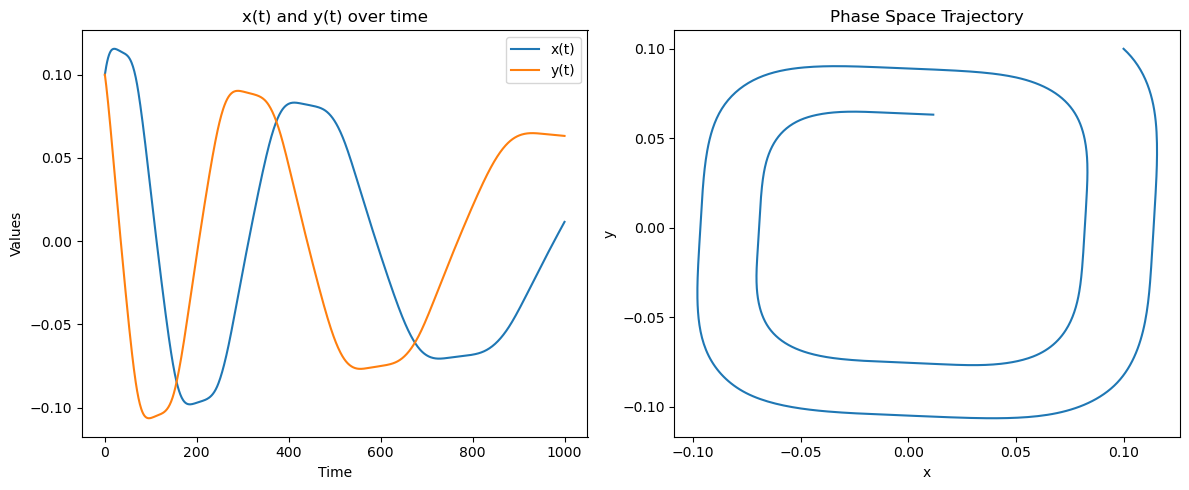

In [12]:
# Define the dynamical system
def dynamical_system(t, z):
    x, y = z
    dxdt = -0.1 * x**3 + 2 * y**3
    dydt = -2 * x**3 - 0.1 * y**3
    return [dxdt, dydt]

# Initial conditions
x0, y0 = 0.1, 0.1
initial_conditions = [x0, y0]

# Time span for the solution
t_span = (0, 1000)  # simulate from t=0 to t=10
t_eval = np.linspace(*t_span, 1000)

# Solve the ODE
solution = solve_ivp(dynamical_system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract results
t_data = solution.t
x_data = solution.y[0]
y_data = solution.y[1]

# Plot the results
plt.figure(figsize=(12, 5))

# Plot x and y over time
plt.subplot(1, 2, 1)
plt.plot(t_data, x_data, label="x(t)")
plt.plot(t_data, y_data, label="y(t)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.title("x(t) and y(t) over time")

# Plot phase space trajectory
plt.subplot(1, 2, 2)
plt.plot(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Space Trajectory")
plt.tight_layout()
plt.show()